In [1]:
import sqlite3 as db
import matplotlib.pyplot as plt
import pandas as pd

#connect to database or create if doesn't exist
conn = db.connect('../data/230130_home-assistant_v2.db')

In [11]:
%matplotlib widget

In [20]:
data = pd.read_sql_query("""
SELECT start AS Time, mean AS Temperature
FROM statistics 
WHERE metadata_id IN (SELECT id FROM statistics_meta WHERE statistic_id = "sensor.28_ff5ad9501603_temperature") 
AND min > -20 
AND max < 40;
""", conn, parse_dates=["Time"])

# Zeiten selektieren
#data[data["Time"] > "2022-01-18"]

# Index nicht mehr numerisch, sondern das Datetime-Feld nutzen
data = data.set_index('Time')

data

,Temperature
Time,
2021-10-04 10:00:00,24.000000
2021-10-04 11:00:00,24.000000
2021-10-04 12:00:00,24.044342
2021-10-04 13:00:00,24.100000
2021-10-04 14:00:00,24.033312
...,...
2023-01-29 18:00:00,19.800793
2023-01-29 19:00:00,19.805816
2023-01-29 20:00:00,19.800820


Text(0.5, 0.98, '')

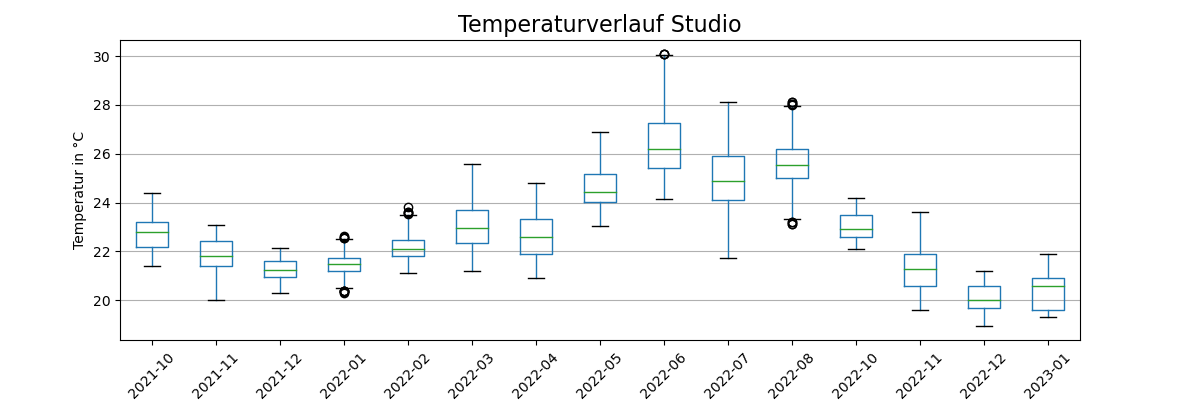

In [21]:
plotdata = data
plotdata['TimeGroup'] = plotdata.index.to_period('M')
h = plt.figure(figsize=(12, 4))
ax = h.gca()
plotdata.boxplot(by='TimeGroup',column='Temperature',rot=45,ax=ax)
ax.grid(axis='x')
ax.set_title("Temperaturverlauf Studio",font='LiberationSans', size=16)
ax.set_ylabel("Temperatur in °C")
h.suptitle('')

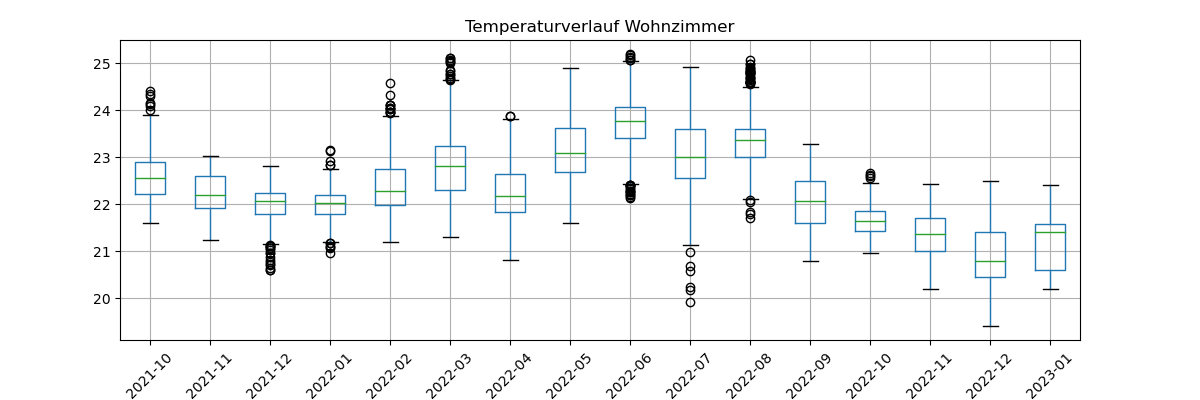

In [22]:
data = pd.read_sql_query("""
SELECT start AS Time, mean AS Temperature
FROM statistics 
WHERE metadata_id IN (SELECT id FROM statistics_meta WHERE statistic_id = "sensor.28_ff380fb41603_temperature") 
AND min > -20 
AND max < 40;
""", conn, parse_dates=["Time"]).set_index('Time')
data['TimeGroup'] = data.index.to_period('M')
fig, axs = plt.subplots(figsize=(12, 4))
data.boxplot(by='TimeGroup',column='Temperature',rot=45,ax=axs)
fig.suptitle('')
axs.set_title('Temperaturverlauf Wohnzimmer');

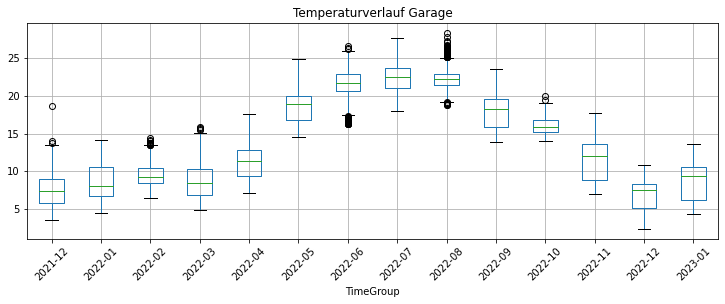

In [10]:
data = pd.read_sql_query("""
SELECT start AS Time, mean AS Temperature
FROM statistics 
WHERE metadata_id IN (SELECT id FROM statistics_meta WHERE statistic_id = "sensor.garage_temperatur") 
AND min > -20 
AND max < 40;
""", conn, parse_dates=["Time"]).set_index('Time')
data['TimeGroup'] = data.index.to_period('M')
fig, axs = plt.subplots(figsize=(12, 4))
data.boxplot(by='TimeGroup',column='Temperature',rot=45,ax=axs)
fig.suptitle('')
axs.set_title('Temperaturverlauf Garage');